In [1]:
import pandas as pd
import numpy as np

In [2]:
import httpx

In [3]:
cardataset_url = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"
df = pd.read_csv(cardataset_url)

## Chapter 2.2

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Clean up data

#### Clean up columns

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [6]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


#### Clean up rows

In [7]:
for c in df.columns[df.dtypes == "object"]:
    df[c] = df[c].str.lower().str.replace(' ','_')

In [8]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Chapter 2.3 Exploratory Data Analysis

#### Summary of data

In [9]:
for col in df.columns:
    print(
        col, 
        df[col].unique()[:5], 
        df[col].nunique(), 
        sep="\n", 
        end="\n\n"
    )

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

#### Visualizaing data [MSRP]

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: xlabel='msrp', ylabel='Count'>

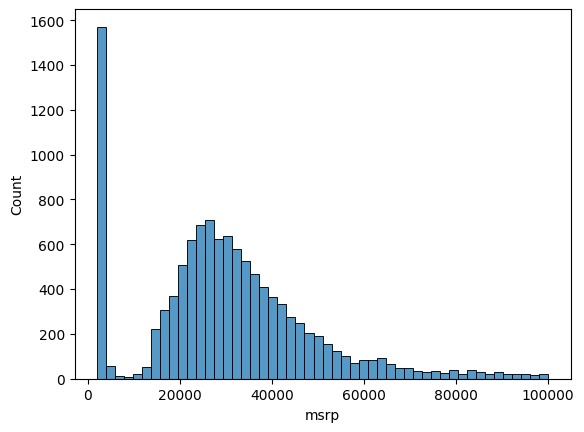

In [11]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

#### Avoiding outliers

In [12]:
price_logs = np.log1p(df.msrp)

<AxesSubplot: xlabel='msrp', ylabel='Count'>

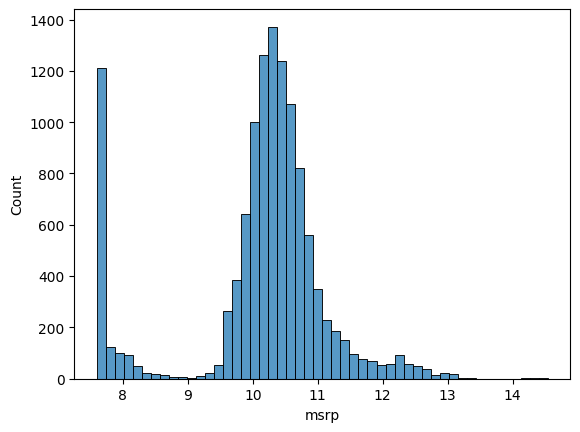

In [13]:
sns.histplot(price_logs, bins=50)

#### Missing value

In [14]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Chapter 2.4 Setting up the validation Framework

In [15]:
from dataclasses import dataclass
from typing import Any

@dataclass
class Data:
    data: Any
    y: Any
        
def prepare_data(df, *, random_seed=10):
    df = df.fillna(0) # no n/a values
    df_n = len(df)
    shuffle_df = df.iloc[_generate_shuffle_df(df_n, random_seed)]
    
    df_20 = int(df_n*.2)
    df_40 = df_20 * 2

    d_val = shuffle_df[:df_20]
    d_test = shuffle_df[df_20:df_40]
    d_train = shuffle_df[df_40:]
    
    y_val = d_val
    
    ys = [_split_col(m, 'msrp') for m in [d_val, d_test, d_train]]
    
    return {
        "validation": Data(d_val, ys[0]),
        "test": Data(d_test, ys[1]),
        "train": Data(d_train, ys[2])
    }
    
def _split_col(df, col_name):
    splitted = df[col_name]
    del df[col_name]
    return splitted

def _generate_shuffle_df(n, seed=0):
    np.random.seed(seed)
    ns = np.arange(n)
    np.random.shuffle(ns)
    return ns

In [16]:
prep_data = prepare_data(df)

## Chapter 2.5-2.8: Linear Regression car price baseline model

In [56]:
X_train = prep_data["train"].data
X_train = X_train[["engine_hp", "engine_cylinders", "highway_mpg", "city_mpg", "popularity"]].values
y_train = np.log1p(prep_data["train"].y.values)

<AxesSubplot: ylabel='Count'>

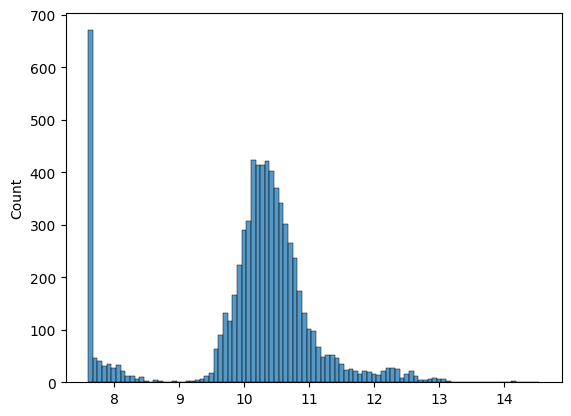

In [57]:
sns.histplot(y_train)

In [58]:
def train_linear_regression(X, y):
    """
    Linear regression simplified forumula: Xw = y where X is matrix and w = weight and y is output
    We need to find w.
    In order to find w we can technically do the following:
    X_inv.X.w = X_inv.y
    w = X_inv.y
    BUT!!, this is not allowed/possible since X_inv.X (read X inverse dot product X) cannot be done
    So, we do the following instead
    X_T.X.w = X_T.y
    ((X_T.X)-1).(X_T.X).w = ((X_T.X)-1).X_T.y
    w = ((X_T.X)-1).X_T.y # 😎😎😎
    """
    
    # Add ones
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XT = X.T
    XTX = XT.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    return (XTX_inv.dot(XT)).dot(y)

In [59]:
w = train_linear_regression(X_train, y_train)
w0, w = w[0], w[1:]
y_pred = w0 + X_train.dot(w)

<AxesSubplot: ylabel='Count'>

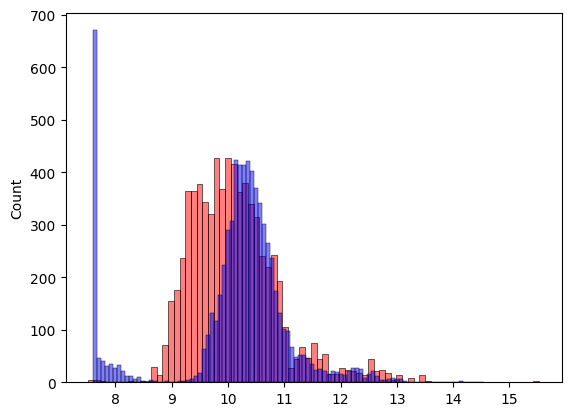

In [63]:
sns.histplot(y_pred,color="red", alpha=0.5)
sns.histplot(y_train,color="blue",alpha=0.5)

## Chapter 2.9: RMSE